<a href="https://colab.research.google.com/github/lokrajs/colabExercises/blob/main/RNNSynthetic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

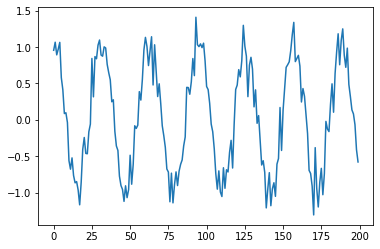

In [35]:
periodic_series = np.cos(0.2*np.arange(200)) + np.random.randn(200)*0.2

plt.plot(periodic_series)
plt.show()

In [36]:
print(periodic_series.shape)

T = 10
D = 1
X = []
Y = []
for t in range(len(periodic_series)-T):
  # append segments of length big T from the series data to the training data X
  X.append(periodic_series[t:t+T])
  # append the next Y after T steps to the training data Y
  Y.append(periodic_series[t+T])

# Need X to be in the shape of N x T x D 
# N should be 190 since there can only be N - T timed samples
# T should be 10 just as predefined above
# D should be 1 since we're looking only at this cosine function
X = np.array(X).reshape(-1,T,1)
print(X.shape)
Y = np.array(Y)
print(Y.shape)


(200,)
(190, 10, 1)
(190,)


In [46]:
# Autoregressive RNN model

model = tf.keras.Sequential([
    tf.keras.layers.Input((T,1)),
    tf.keras.layers.SimpleRNN(5,activation=None),
    tf.keras.layers.Dense(1)
])


model.compile(loss='mse',optimizer = tf.keras.optimizers.Adam(learning_rate=0.01))

r = model.fit(
    X[:-X.shape[0]//2], Y[:-Y.shape[0]//2],epochs=150,validation_data = (X[-X.shape[0]//2:], Y[-Y.shape[0]//2:])
)


Epoch 1/150
3/3 [==============================] - 1s 101ms/step - loss: 0.9607 - val_loss: 0.3700
Epoch 2/150
3/3 [==============================] - 0s 14ms/step - loss: 0.2734 - val_loss: 0.1839
Epoch 3/150
3/3 [==============================] - 0s 14ms/step - loss: 0.1603 - val_loss: 0.1650
Epoch 4/150
3/3 [==============================] - 0s 12ms/step - loss: 0.1461 - val_loss: 0.1376
Epoch 5/150
3/3 [==============================] - 0s 13ms/step - loss: 0.1144 - val_loss: 0.1064
Epoch 6/150
3/3 [==============================] - 0s 12ms/step - loss: 0.0840 - val_loss: 0.0905
Epoch 7/150
3/3 [==============================] - 0s 12ms/step - loss: 0.0758 - val_loss: 0.0903
Epoch 8/150
3/3 [==============================] - 0s 13ms/step - loss: 0.0764 - val_loss: 0.0946
Epoch 9/150
3/3 [==============================] - 0s 13ms/step - loss: 0.0781 - val_loss: 0.0941
Epoch 10/150
3/3 [==============================] - 0s 12ms/step - loss: 0.0744 - val_loss: 0.0886
Epoch 11/150
3/3 [

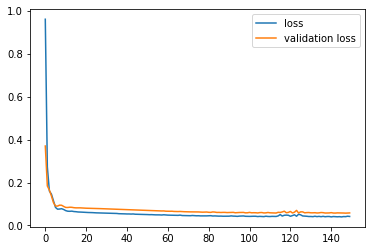

In [47]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='validation loss')
plt.legend()

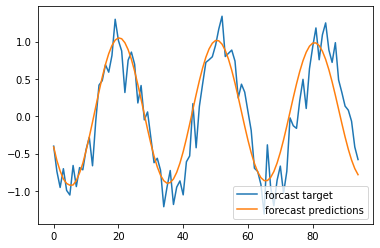

In [48]:
second = Y[-Y.shape[0]//2:]
predictions = []

latest = X[-X.shape[0]//2]

while(len(predictions) < len(second)):
  p = model.predict(latest.reshape(1,-1,1))[0,0]

  predictions.append(p)

  latest = np.roll(latest,-1)
  latest[-1] = p

plt.plot(second, label='forcast target')
plt.plot(predictions,label='forecast predictions')
plt.legend()
